In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Path
path = r'C:\Users\savet\Desktop\Career Foundry\Achievement 6'

In [3]:
#Import Dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned.csv'))

In [4]:
df.head()

Unnamed: 0 Currency  Price            Boat Type                 Type  \
0           0      CHF   3337          Motor Yacht  new boat from stock   
1           1      EUR   3490  Center console boat  new boat from stock   
2           2      DKK  25900           Sport Boat  new boat from stock   
3           3      EUR   3399         Fishing Boat  new boat from stock   
4           4      CHF   3600            Catamaran            Used boat   

   Year Built  Length  Width  Number of views last 7 days      Country  \
0        2017    4.00   1.90                          226  Switzerland   
1        2020    4.00   1.50                           75      Germany   
2        2020    3.00   1.00                           64      Denmark   
3        2019    3.55   1.46                           58      Germany   
4        1999    6.20   2.38                          474  Switzerland   

  Continent  
0    Europe  
1    Europe  
2    Europe  
3    Europe  
4    Europe

In [5]:
df = df.drop(columns = ['Unnamed: 0'])

In [6]:
df.dtypes

Currency                        object
Price                            int64
Boat Type                       object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Number of views last 7 days      int64
Country                         object
Continent                       object
dtype: object

In [7]:
#Create a subset 
subset = df[['Price','Year Built','Length','Width','Number of views last 7 days']]

In [8]:
subset.head()

Price  Year Built  Length  Width  Number of views last 7 days
0   3337        2017    4.00   1.90                          226
1   3490        2020    4.00   1.50                           75
2  25900        2020    3.00   1.00                           64
3   3399        2019    3.55   1.46                           58
4   3600        1999    6.20   2.38                          474

# Visualizations

## Correlation Matrix Heatmap

Text(0.5, 1.0, 'Correlation Matrix')

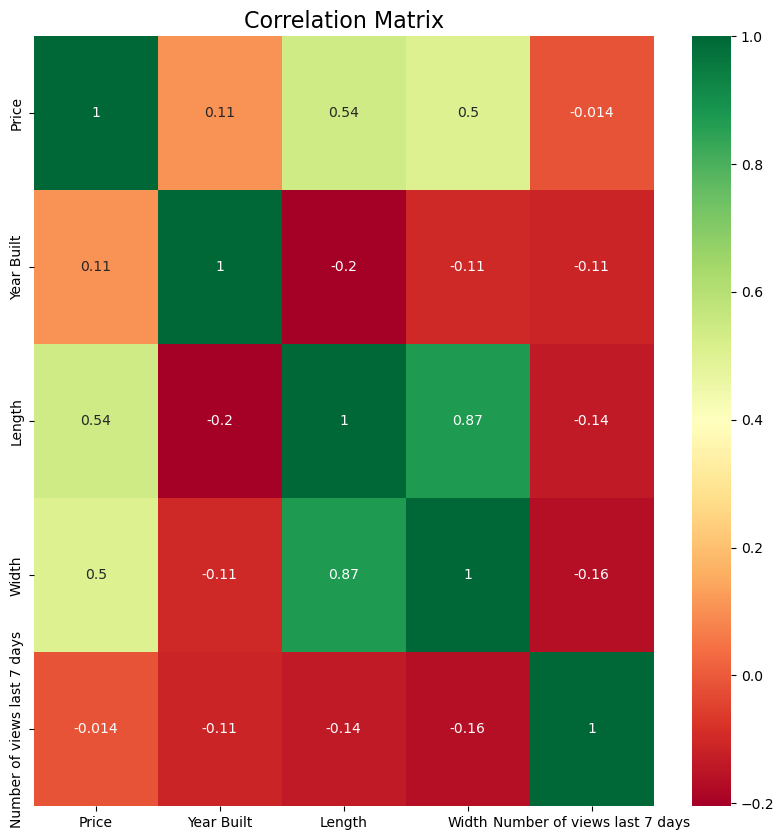

In [9]:
f,ax = plt.subplots(figsize=(10,10))
corr = sb.heatmap(subset.corr(),cmap="RdYlGn", annot = True, ax = ax)
plt.title('Correlation Matrix', fontsize=16)

Length and Width have the strongest positive correlation, followed by Price and Length, and then Price and Width.  This makes sense because the bigger the boat, the greater the cost of the boat will be.  

Width and Number of views last 7 days have a negative correlation which while being technically weak is still the strongest negative correlation.

## Scatterplot

C:\Users\savet\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


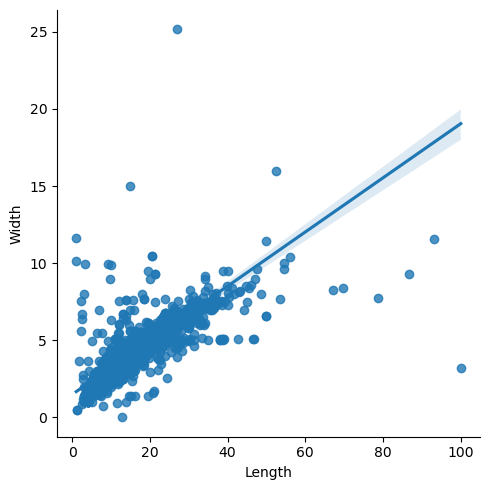

In [10]:
sb.lmplot(x = 'Length', y = 'Width', data = df)

## Pair Plot

C:\Users\savet\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


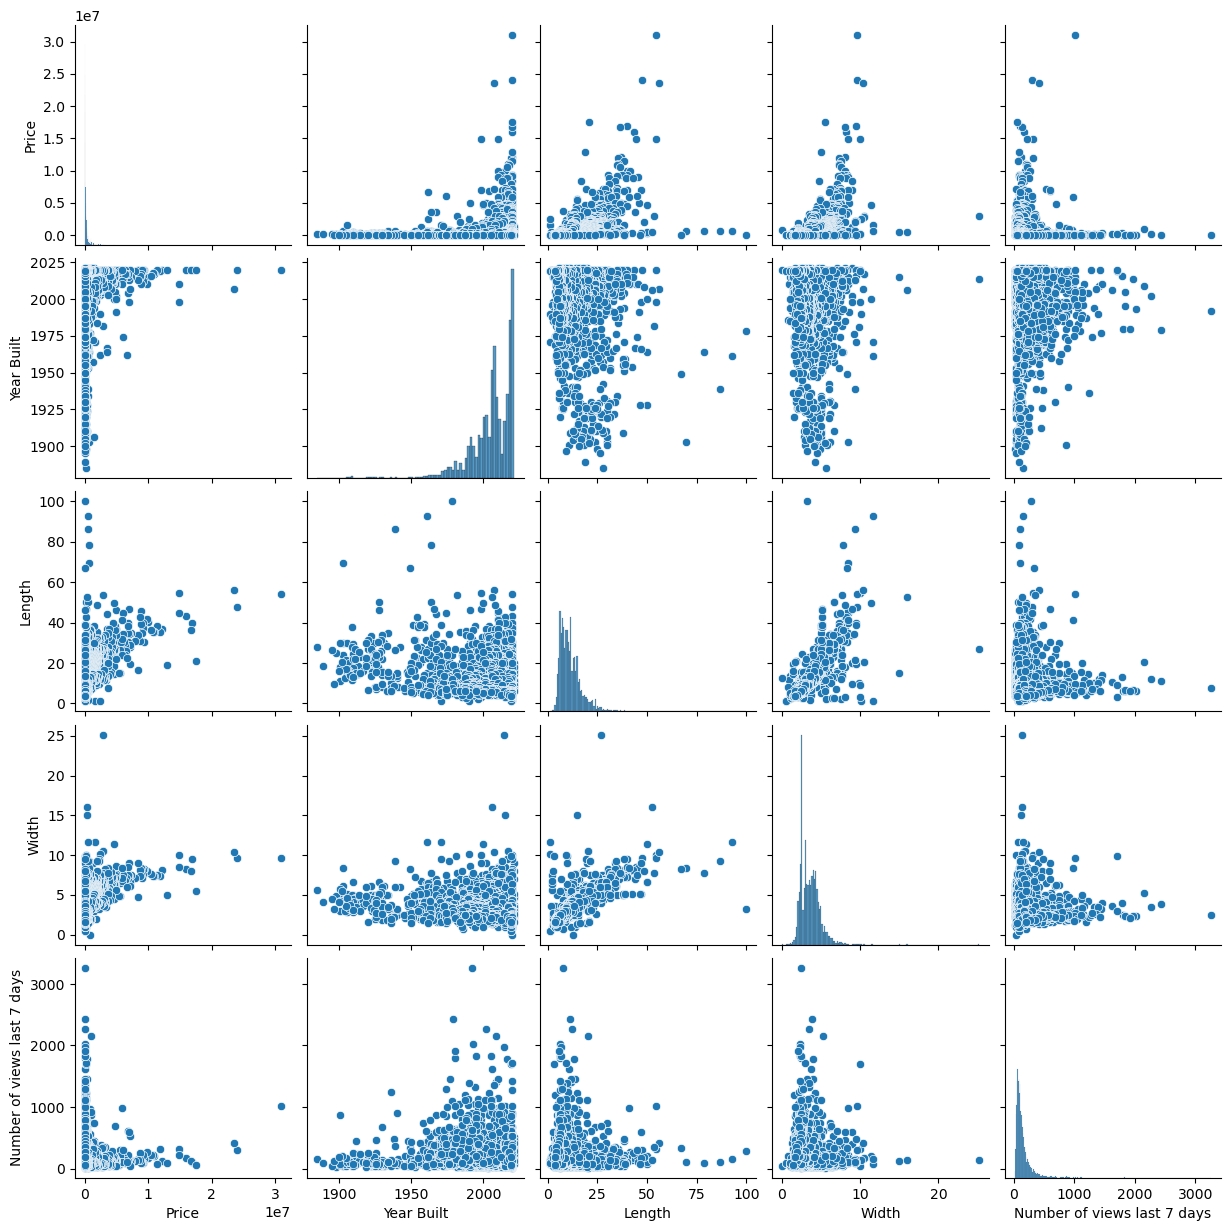

In [11]:
pairplot = sb.pairplot(df)

The distributions of Year Built and Number of views last 7 days, Price and Year Built, and Price and Number of views last 7 days while not necessarily surprising are variables I'd like to look further into.  

## Categorical Plot

<Axes: xlabel='Price', ylabel='Count'>

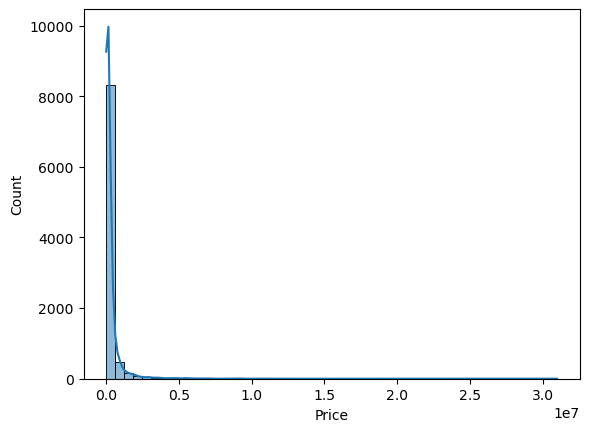

In [12]:
sb.histplot(df['Price'], bins = 50, kde = True)

The majority of boats cost less than 250,000.   

<Axes: xlabel='Currency', ylabel='Count'>

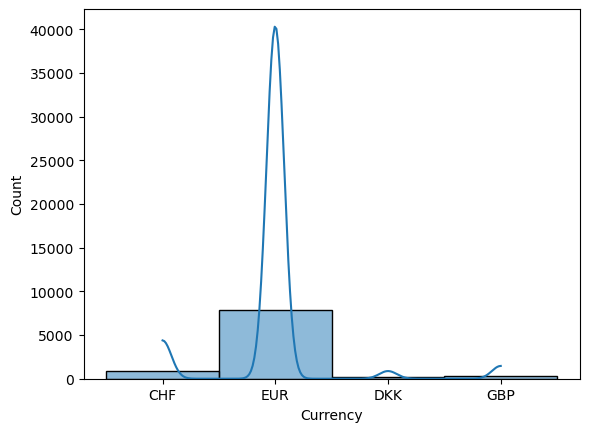

In [13]:
sb.histplot(df['Currency'], bins = 4, kde = True)

The majority of payments are made in Euros.  

Text(0.5, 1.0, 'Number of Boats Each Year')

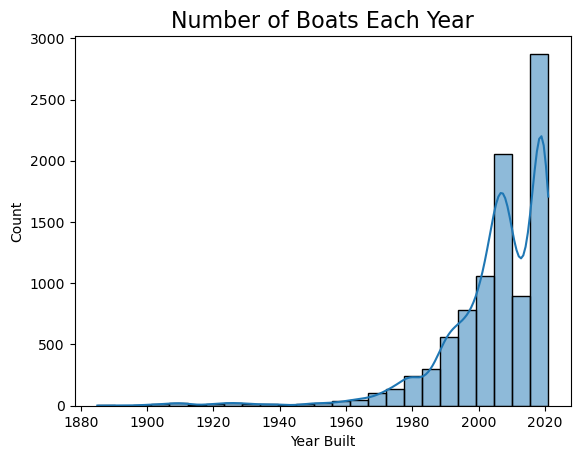

In [17]:
yearbuilt = sb.histplot(df['Year Built'], bins = 25, kde = True)
plt.title('Number of Boats Each Year', fontsize=16)

Boats built more recently are purchased more than older boats.  

# Questions

What is the rate of boat sales each year built? The majority of boats that are purchased are built between 2005-2010 and 2015-2020.

What types of boats are being sold and how many of each?

What  type of power/fuel is used to run the boats? (Not sure this question can be answered now.)

Where are boat sales occurring the most? Majority of sales occur in Europe. 

# Hypotheses

Hypothesis 1: Boats will be more expensive if they are larger.
Hypothesis 2: Boats will be more expensive if they are newer.

These hypotheses can't be tested. 
-------------------------------------------------------
Hypothesis: A boat will be more expensive if it is more fuel efficient.  Hypothesis: A boat will be more expensive if it uses a stronger building material?

In [15]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'corr_matrix.png'),bbox_inches='tight')

In [18]:
yearbuilt.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'yearbuilt.png'),bbox_inches='tight')